In [42]:
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure, feature
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt

# Get Paths
ROOT_DIR = os.path.dirname(os.path.abspath('__file__'))
head, _ = os.path.split(ROOT_DIR)

# print(head,'\n',_)

In [8]:
ROOT_DIR,head, _

('d:\\CV_master\\comp\\allianz\\REPO\\temp',
 'd:\\CV_master\\comp\\allianz\\REPO',
 'temp')

In [5]:
'__file__'

'__file__'

In [32]:
imagePath='D:\CV_master\comp\\allianz\REPO\data\\train\\1\\2020-ford-explorer_100704699_m.jpg'
# get label from folder name
label = imagePath.split("\\")[-2]
label

'1'

In [33]:
image = cv.imread(imagePath)

In [36]:
image.shape

(399, 640, 3)

In [39]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [40]:
gray.shape

(399, 640)

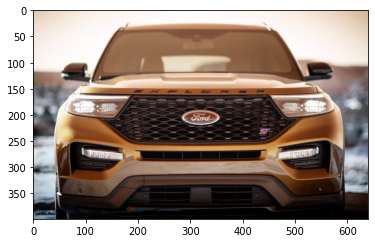

In [48]:
plt.imshow(image)

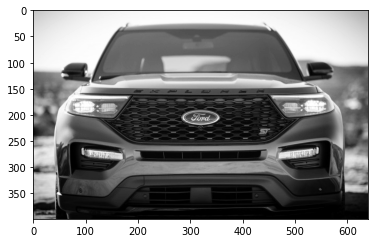

In [46]:
plt.imshow(gray,cmap='gray')

In [50]:
md = np.median(gray)
sigma = 0.35
low = int(max(0, (1.0 - sigma) * md))
up = int(min(255, (1.0 + sigma) * md))
# Create Edged Image from Gray Scale
edged = cv.Canny(gray, low, up)

In [52]:
edged.shape

(399, 640)

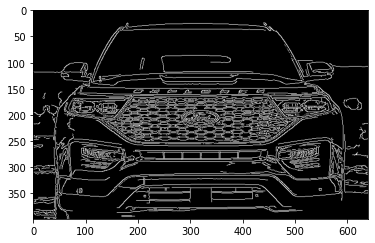

In [54]:
plt.imshow(edged,cmap='gray')

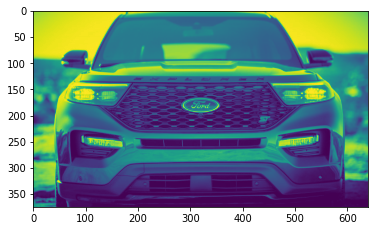

In [55]:
(x, y, w, h) = cv.boundingRect(edged)
logo = gray[y:y + h, x:x + w]
# logo = cv.resize(logo, (200, 100))
plt.imshow(logo)

In [56]:
(x, y, w, h)

(0, 24, 640, 375)

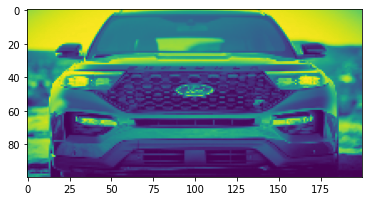

In [57]:
logo = cv.resize(logo, (200, 100))
plt.imshow(logo)

In [58]:
hist = feature.hog(
    logo,
    orientations=9,
    pixels_per_cell=(10, 10), cells_per_block=(2, 2),
    transform_sqrt=True,
    block_norm="L1"
)

In [60]:
hist.shape

(6156,)

In [62]:
gray.shape[0]*gray.shape[1]

255360

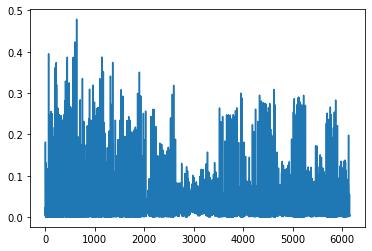

In [63]:
plt.plot(hist)